# Sentiment Analysis with Python

## Import and read data

In [1]:
## Importing the necessary libraries along with the standard import

import numpy as np
import pandas as pd
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import random
import string # this is used for string manipulations

nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('movie_reviews')
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [111]:
import matplotlib.pyplot as plt

In [2]:
len(inaugural.fileids()) # Checking the length/no. fileids

59

In [3]:
inaugural.raw(inaugural.fileids()[0])

'Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not

### No of Characters

In [13]:
print('The no. of characters in Franklin D.Roosevelt speech is {} '.format(len(inaugural.raw('1941-Roosevelt.txt'))))
print('The no. of characters in John F. Kennedy speech is {} '.format(len(inaugural.raw('1961-Kennedy.txt'))))
print('The no. of characters in Richard Nixon speech is {} '.format(len(inaugural.raw('1973-Nixon.txt'))))


The no. of characters in Franklin D.Roosevelt speech is 7571 
The no. of characters in John F. Kennedy speech is 7618 
The no. of characters in Richard Nixon speech is 9991 


### No of Words

In [14]:
print('The no. of words in Franklin D.Roosevelt speech is {} '.format(len(inaugural.words('1941-Roosevelt.txt'))))
print('The no. of words in John F. Kennedy speech is {} '.format(len(inaugural.words('1961-Kennedy.txt'))))
print('The no. of words in Richard Nixon speech is {} '.format(len(inaugural.words('1973-Nixon.txt'))))


The no. of words in Franklin D.Roosevelt speech is 1536 
The no. of words in John F. Kennedy speech is 1546 
The no. of words in Richard Nixon speech is 2028 


### No of Sentences

In [27]:
print('The no. of Sentences in Franklin D.Roosevelt speech is {} '.format(len(nltk.corpus.inaugural.sents('1941-Roosevelt.txt'))))
print('The no. of Sentences in John F. Kennedy speech is {} '.format(len(nltk.corpus.inaugural.sents('1961-Kennedy.txt'))))
print('The no. of Sentences in Richard Nixon speech is {} '.format(len(nltk.corpus.inaugural.sents('1973-Nixon.txt'))))


The no. of Sentences in Franklin D.Roosevelt speech is 68 
The no. of Sentences in John F. Kennedy speech is 52 
The no. of Sentences in Richard Nixon speech is 69 


In [55]:
#Most frequent words in inaugral package
nltk.FreqDist(inaugural.words()).most_common(10)

[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769)]

In [60]:
nltk.FreqDist(inaugural.words('1941-Roosevelt.txt')).most_common(10)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24)]

In [61]:
nltk.FreqDist(inaugural.words('1961-Kennedy.txt')).most_common(10)


[(',', 85),
 ('the', 83),
 ('of', 65),
 ('.', 51),
 ('to', 38),
 ('and', 37),
 ('a', 29),
 ('we', 27),
 ('--', 25),
 ('in', 24)]

In [62]:
nltk.FreqDist(inaugural.words('1973-Nixon.txt')).most_common(10)

[(',', 96),
 ('the', 80),
 ('.', 68),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32)]

2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [80]:
stop_new = stopwords.words('engish')

AttributeError: 'list' object has no attribute 'words'

In [22]:
def remove_stopwords(array,stopw):
    filtered =[]
    for a in array:
        al = a.lower()
        if al not in stopw and a != '--':
            filtered.append(al)
    return filtered

stopw = set(stopwords.words('english') +list(string.punctuation))
Rwords = remove_stopwords(inaugural.words('1941-Roosevelt.txt'),stopw)
Kwords = remove_stopwords(inaugural.words('1961-Kennedy.txt'),stopw)
Nwords = remove_stopwords(inaugural.words('1973-Nixon.txt'),stopw)       

211

In [71]:
print('The no. of words in Franklin D.Roosevelt speech after Stopwords Removal is {} '.format(len(Rwords)))
print('The no. of words in John F. Kennedy speech after Stopwords Removal is {} '.format(len(Kwords)))
print('The no. of words in Richard Nixon speech after Stopwords Removal is {} '.format(len(Nwords)))

The no. of words in Franklin D.Roosevelt speech after Stopwords Removal is 632 
The no. of words in John F. Kennedy speech after Stopwords Removal is 697 
The no. of words in Richard Nixon speech after Stopwords Removal is 836 


In [67]:
nltk.FreqDist(Rwords).most_common(3)

[('nation', 12), ('know', 10), ('spirit', 9)]

In [69]:
nltk.FreqDist(Kwords).most_common(3)

[('let', 16), ('us', 12), ('world', 8)]

In [68]:
nltk.FreqDist(Nwords).most_common(3)

[('us', 26), ('let', 22), ('america', 21)]

In [90]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words())

In [91]:
#Finding All the stop words
all_words_unclean = [word for word in all_words if word in stopwords]
print(all_words_unclean[0:15])


['-', 'of', 'the', 'and', 'of', 'the', 'of', ':', 'the', 'to', 'no', 'have', 'me', 'with', 'than']


In [92]:
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]
print(all_words_clean)
# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)
#print(all_words_freq)
# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]
print(word_features[0:15])

[]
[]


In [94]:
all_words_clean = [word for word in all_words if word not in stopwords]
print(all_words_clean)

[]


**Word Cloud**

In [81]:
!pip install wordcloud

In [84]:
from wordcloud import WordCloud,STOPWORDS

In [106]:
import collections
from collections import Counter

nation :  12
know :  10
spirit :  9
life :  9
democracy :  9
us :  8
people :  7
america :  7
years :  6
freedom :  6
human :  5
men :  5
new :  5
body :  5
mind :  5
speaks :  5
day :  4
states :  4
government :  4
must :  4
something :  4
faith :  4
united :  3
task :  3
within :  3
history :  3
nations :  3
three :  3
live :  3
future :  3


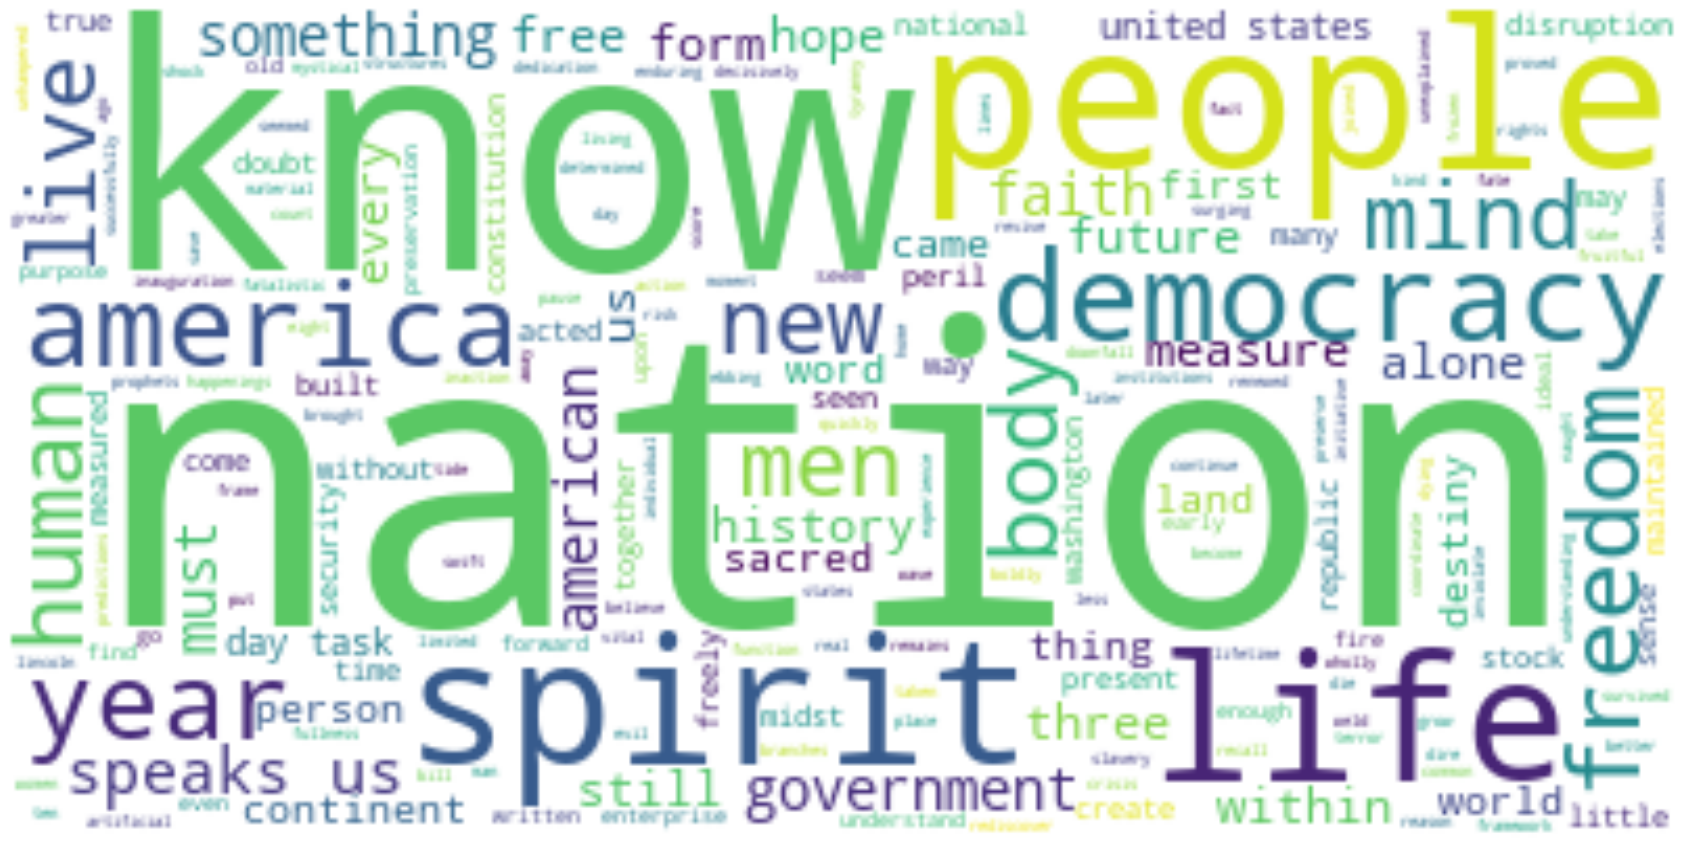

In [113]:
# Check for the world Cloud creation for Roosevelt' Speech
speaker_count = {}
for word in Rwords:
    if word in speaker_count.keys():
        speaker_count[word] = speaker_count[word] + 1
    else:
        speaker_count[word] = 1

d = collections.Counter(speaker_count)
tot = len(inaugural.words('1941-Roosevelt.txt'))
    
top_30 = d.most_common(30)
    
#print(name + " spoke a total number of " + str(tot) + " words.")
for word, count in d.most_common(30):
     print(word, ": ", count)

wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords, 
               contour_width=3, contour_color='lightgrey')   
text = ' '.join(Rwords)
wc.generate(text)
print(wc)
plt.figure(figsize=[30,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

let :  16
us :  12
world :  8
sides :  8
new :  7
pledge :  7
citizens :  5
power :  5
shall :  5
free :  5
nations :  5
ask :  5
president :  4
fellow :  4
freedom :  4
man :  4
first :  4
americans :  4
war :  4
peace :  4
always :  4
cannot :  4
hope :  4
help :  4
arms :  4
country :  4
call :  4
today :  3
well :  3
god :  3


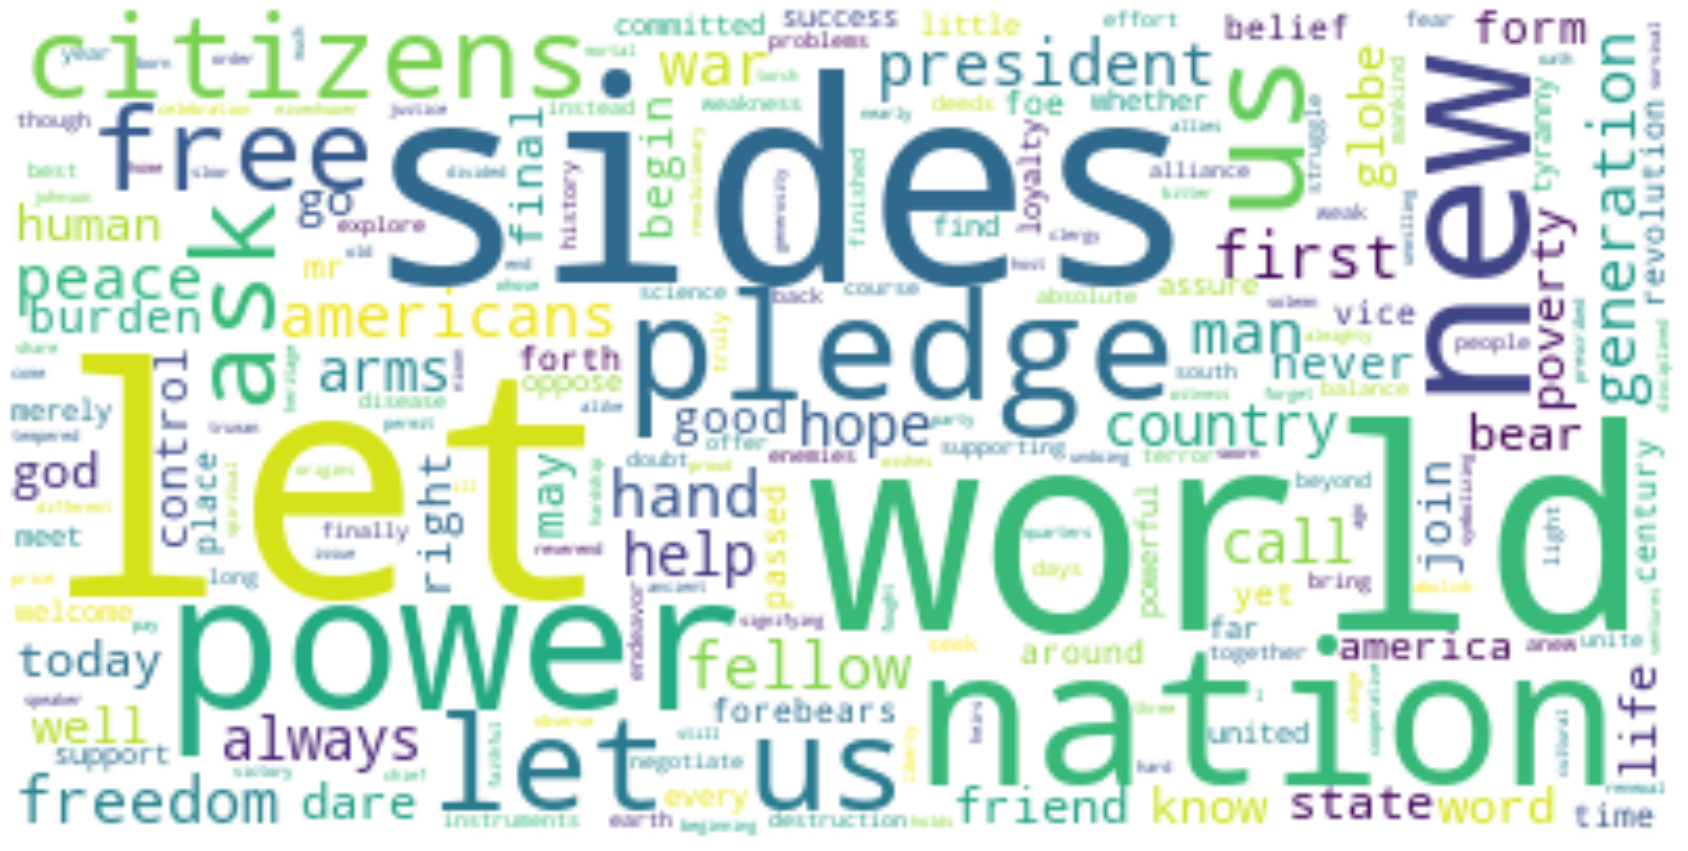

In [114]:
# Check for the world Cloud creation for Kennedy's Speech
speaker_count = {}
for word in Kwords:
    if word in speaker_count.keys():
        speaker_count[word] = speaker_count[word] + 1
    else:
        speaker_count[word] = 1

d = collections.Counter(speaker_count)
tot = len(inaugural.words('1941-Roosevelt.txt'))
    
top_30 = d.most_common(30)
    
#print(name + " spoke a total number of " + str(tot) + " words.")
for word, count in d.most_common(30):
     print(word, ": ", count)

wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords, 
               contour_width=3, contour_color='lightgrey')   
text = ' '.join(Kwords)
wc.generate(text)
print(wc)
plt.figure(figsize=[30,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

us :  26
let :  22
america :  21
peace :  19
world :  18
new :  15
nation :  11
responsibility :  11
government :  10
great :  9
home :  9
abroad :  8
together :  7
years :  7
shall :  7
policies :  7
role :  7
make :  7
every :  7
history :  7
better :  7
time :  6
right :  6
people :  6
help :  6
four :  5
today :  5
era :  5
responsibilities :  5
progress :  5


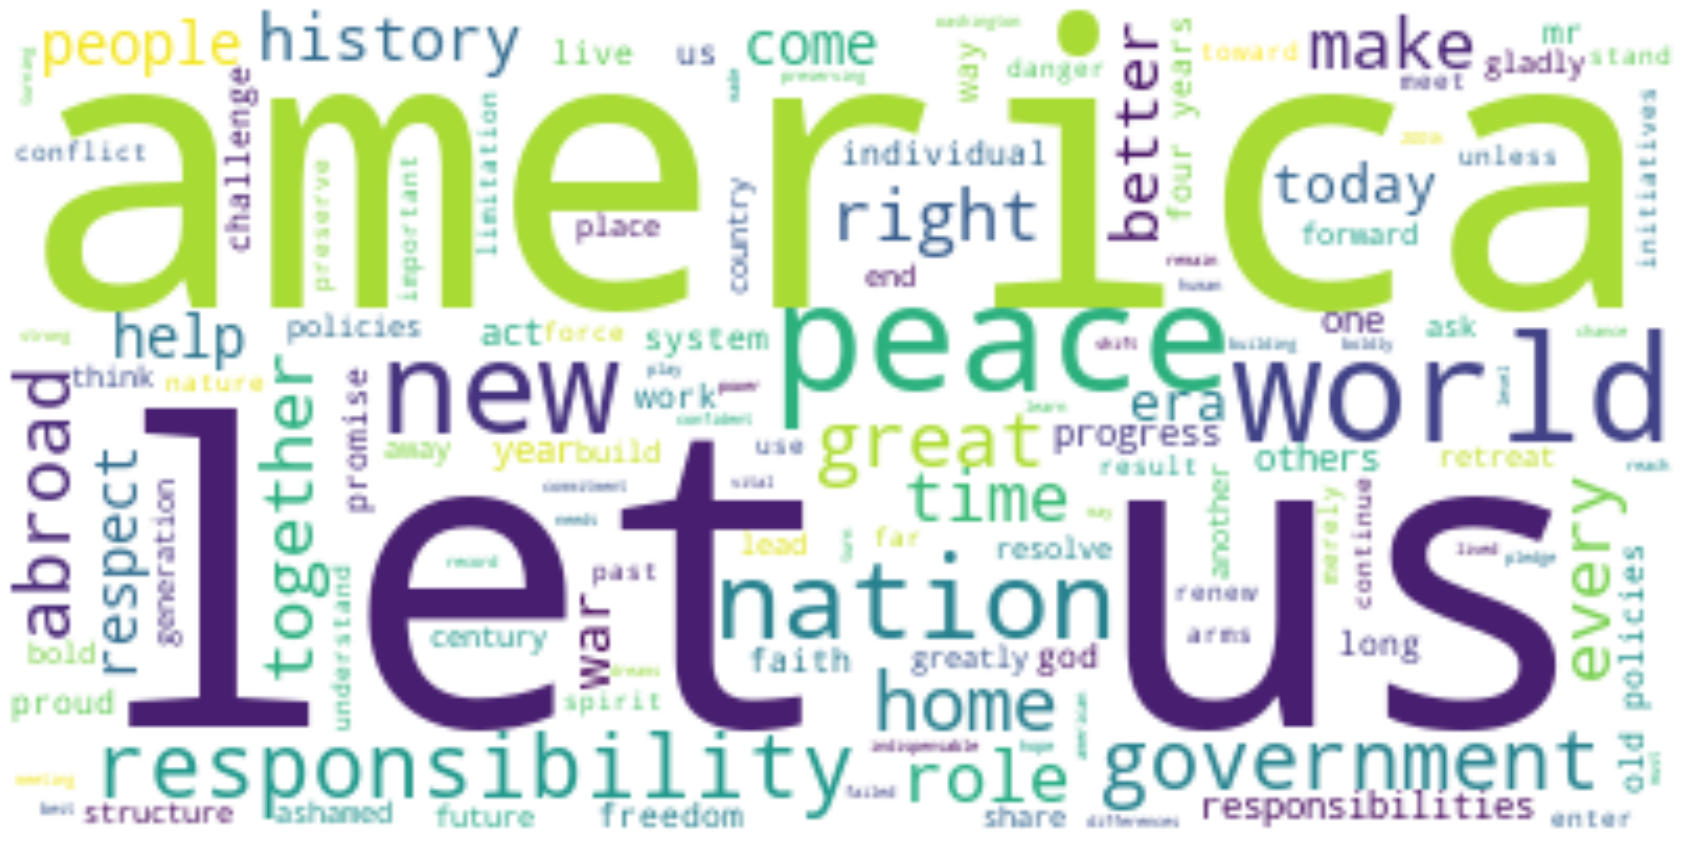

In [115]:
# Check for the world Cloud creation for Nixon's Speech
speaker_count = {}
for word in Nwords:
    if word in speaker_count.keys():
        speaker_count[word] = speaker_count[word] + 1
    else:
        speaker_count[word] = 1

d = collections.Counter(speaker_count)
tot = len(inaugural.words('1941-Roosevelt.txt'))
    
top_30 = d.most_common(30)
    
#print(name + " spoke a total number of " + str(tot) + " words.")
for word, count in d.most_common(30):
     print(word, ": ", count)

wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords, 
               contour_width=3, contour_color='lightgrey')   
text = ' '.join(Nwords)
wc.generate(text)
print(wc)
plt.figure(figsize=[30,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# A little difference in the results is due to random.shuffle as it randomly shuffle the list